In [1]:
import sklearn

sklearn.__version__

'1.7.2'

## Veri setini yükleme

In [2]:
from sklearn.datasets import fetch_openml

mnist=fetch_openml("mnist_784", as_frame = False)

## Veri setini tanıma

In [3]:
mnist.details

{'id': '554',
 'name': 'mnist_784',
 'version': '1',
 'description_version': '2',
 'format': 'ARFF',
 'creator': ['Yann LeCun', 'Corinna Cortes', 'Christopher J.C. Burges'],
 'upload_date': '2014-09-29T03:28:38',
 'language': 'English',
 'licence': 'Public',
 'url': 'https://api.openml.org/data/v1/download/52667/mnist_784.arff',
 'parquet_url': 'https://data.openml.org/datasets/0000/0554/dataset_554.pq',
 'file_id': '52667',
 'default_target_attribute': 'class',
 'tag': ['Artificial Intelligence',
  'AzurePilot',
  'Computer Vision',
  'Data Sets',
  'Kaggle',
  'Machine Learning',
  'OpenML-CC18',
  'OpenML100',
  'study_1',
  'study_123',
  'study_41',
  'study_99',
  'vision'],
 'visibility': 'public',
 'minio_url': 'https://data.openml.org/datasets/0000/0554/dataset_554.pq',
 'status': 'active',
 'processing_date': '2020-11-20 20:12:09',
 'md5_checksum': '0298d579eb1b86163de7723944c7e495'}

In [4]:
mnist.target

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

## Veri setini ön işleme

In [5]:
X, y = mnist.data, mnist.target

In [6]:
X.shape

(70000, 784)

In [7]:
28*28

784

In [8]:
X[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [9]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [10]:
y.shape

(70000,)

## Veriyi görselleştirme

In [11]:
import matplotlib.pyplot as plt 

In [12]:
X[0].shape

(784,)

In [13]:
image = X[0].reshape(28, 28)

(-0.5, 27.5, 27.5, -0.5)

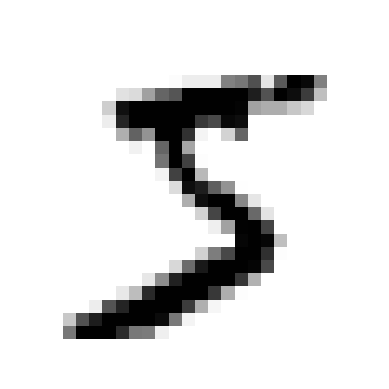

In [14]:
plt.imshow(image, cmap="binary")
plt.axis("off")

In [15]:
y[0]

'5'

## Veriyi parçalama 

In [16]:
# Veriyi karıştırmak için 

from sklearn.utils import shuffle
X_shuffled, y_shuffled = shuffle(X, y, random_state=42)

In [17]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## Model kurma 

In [18]:
y_train_5 = (y_train == "5")
y_test_5 = (y_test == "5")

In [19]:
from sklearn.linear_model import SGDClassifier

sgd_model = SGDClassifier(random_state=42)
sgd_model.fit(X_train, y_train_5)

,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


## Model prediction

In [20]:
sgd_model.predict([X[0]]) 

array([ True])

In [21]:
y_train[0]

'5'

## Model değerlendirme 

In [22]:
from sklearn.model_selection import cross_val_score 

sgd_model = SGDClassifier(random_state=42)
cross_val_score(sgd_model, X_train, y_train_5, cv = 3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [23]:
from sklearn.dummy import DummyClassifier 

dummy_model = DummyClassifier()
cross_val_score(dummy_model, X_train, y_train_5, cv = 3, scoring="accuracy")

array([0.90965, 0.90965, 0.90965])

In [24]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_model, X_train, y_train_5, cv=3)

## Confusion matris

In [25]:
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

### Precision

In [26]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [27]:
3530 / (3530+687)

0.8370879772350012

### Recall

In [28]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [29]:
3530 / (1891 + 3530)

0.6511713705958311

### f1 Skor

In [30]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343847

### ROC

In [31]:
y_scores = cross_val_predict(sgd_model, X_train, y_train_5, cv=3,method="decision_function")

In [32]:
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [33]:
y_train_5

array([ True, False, False, ...,  True, False, False])

In [34]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

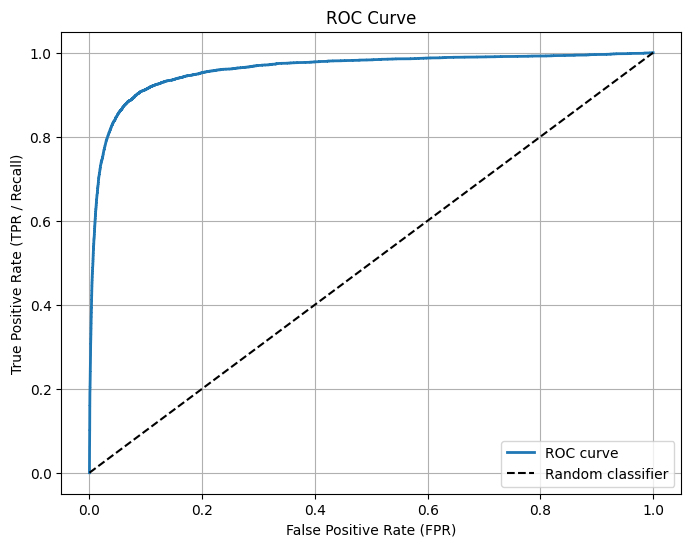

In [35]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k--', label="Random classifier")  # Rastgele çizgi
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR / Recall)")
plt.title("ROC Curve")
plt.grid(True)
plt.legend()
plt.show()

In [36]:
thresholds

array([             inf,   49441.43765905,   36801.60697028, ...,
       -105763.22240074, -106527.45300471, -146348.56726174])

In [37]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_train_5, y_scores)
print("ROC AUC:", auc)

ROC AUC: 0.9604938554008616


This notebook is prepared by [Evren Ozkip](https://www.linkedin.com/in/evren-ozkip)